In [2]:
##### import numpy.random

import scipy
import scipy.optimize
import scipy.constants
import math
import numpy 
import uncertainties
import uncertainties.unumpy 

import matplotlib.axes
import matplotlib.pyplot
import scipy.misc
import scipy.special
import scipy.stats
from random import *
from scipy.special import xlogy
import sys
from scipy.stats import norm
import pandas as pd

def is_number(series):
    counter = 0
    boolArray = numpy.zeros(len(series))
    for i in series:
        try:
            float(i)
            boolArray[counter] = True
        except ValueError:
            boolArray[counter] = False
        counter = counter + 1
    return boolArray

# time in days for MRad sample = 46 (sample D)
t = 60*60*24*46




#import random
#random.shuffle(colors)


import sys
!{sys.executable} -m pip install periodictable
from periodictable import *

!{sys.executable} -m pip install brewer2mpl
import brewer2mpl

# brewer2mpl.get_map args: set name  set type  number of colors
bmap = brewer2mpl.get_map('Paired', 'qualitative', 10)
colors = bmap.mpl_colors


import periodictable

from periodictable import elements as periodictable_elements




DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


In [3]:
# READ IN THE POST-PROCESSED DATA


# GEANT PARAMTERS

sim_n_runs = 100
sim_num_per_run = 10000000
numParticles_sim = sim_n_runs*sim_num_per_run

# EXPERIMENT PARAMETERS

# in cm^3, 1cm x 1cm x 0.5 mm (0.05 cm)
volume = 1*1*0.05
chris_angle = 45*2*math.pi/360
numParticles_expr_100kRAD =  7.5*10**11
numParticles_expr_100kRAD_45deg =  7.5*10**11*math.cos(chris_angle)
SIM_convertToEXPR_100kRAD_perCM3 = (numParticles_expr_100kRAD/numParticles_sim)/volume
SIM_convertToEXPR_100kRAD_perCM3_45edg = (numParticles_expr_100kRAD_45deg/numParticles_sim)/volume
SIM_convertToEXPR_1MRAD_perCM3 = (numParticles_expr_100kRAD*10/numParticles_sim)/volume


# GEANT4 they represent the number produced in the 1cm x 1cm x 0.5mm sample as a result of 1000000000 p at 46 days

# Read in the processed GEANT4 results - as element-wise / semiconductor-wise table
filename = 'GEANT4_RESULTS_PIVOT_All_test.csv'

GEANT4_RESULTS_PIVOT = pd.read_csv(filename)

print(GEANT4_RESULTS_PIVOT.columns)


Index([u'GaAs_material', u'HgCdTe_material', u'InAsSb_material',
       u'InAs_material', u'InSbBi_material_HighBi', u'InSbBi_material_LowBi',
       u'InSb_material', u'Si_material', u'Element_Symbol'],
      dtype='object')


In [4]:
# CREATE THE DATA TO MAKE A NICE GEANT4 PLOT
  
    
import re

GEANT4_RESULTS_PIVOT_Symbol = GEANT4_RESULTS_PIVOT.Element_Symbol
GEANT4_RESULTS_PIVOT_Z = numpy.zeros([len(GEANT4_RESULTS_PIVOT_Symbol),1])


for num, symb in enumerate(GEANT4_RESULTS_PIVOT_Symbol):
    try:
        if numpy.isnan(symb):
            symb = 'NA'
    except:
        1
    elem_periodictable = elements.symbol(symb.capitalize() )
    GEANT4_RESULTS_PIVOT_Z[num] = int(elem_periodictable.number)
    GEANT4_RESULTS_PIVOT_Symbol[num] = symb.upper()

GEANT4_RESULTS_PIVOT['Symbol'] = GEANT4_RESULTS_PIVOT_Symbol
GEANT4_RESULTS_PIVOT['Z'] = GEANT4_RESULTS_PIVOT_Z.astype('int')

GEANT4_RESULTS_PIVOT_bySymbol_Zsort = GEANT4_RESULTS_PIVOT.sort_values(('Z'))

    

/Users/jvl2xv/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
GEANT4_RESULTS_PIVOT_bySymbol_Zsort

,GaAs_material,HgCdTe_material,InAsSb_material,InAs_material,InSbBi_material_HighBi,InSbBi_material_LowBi,InSb_material,Si_material,Element_Symbol,Symbol,Z
16,151925,3630,65138,70877,10412,9771,9626,233986,HE,HE,2
29,0,0,0,0,0,0,0,41106,NE,NE,10
26,0,0,0,0,0,0,0,73781,NA,NA,11
23,0,0,0,0,0,0,0,856530,MG,MG,12
1,0,0,0,0,0,0,0,590091,AL,AL,13
44,0,0,0,0,0,0,0,0,SI,SI,14
31,0,0,0,0,0,0,0,41,P,P,15
41,0,0,0,0,0,0,0,11,S,S,16
10,0,0,0,0,5,0,0,0,CR,CR,24
24,0,0,0,0,3,0,0,0,MN,MN,25


In [25]:
a = ((261361)*SIM_convertToEXPR_100kRAD_perCM3_45edg)/10**9
print(a, numpy.sqrt(261361)*SIM_convertToEXPR_100kRAD_perCM3_45edg/10**9)

# $2.77 \pm 0.005 \times 10^9 cm^{-3}$

(2.772152031565459, 0.005422463692824509)


GEANT4
('GaAs_material', 346.53495)
('HgCdTe_material', 145.67235)
('InAsSb_material', 371.1684)
('InAs_material', 373.023)
('Sn concentration: ', array([[0.]]))
('InSbBi_material_HighBi', 369.33555)


/Users/jvl2xv/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


('InSbBi_material_LowBi', 356.2425)
('InSb_material', 352.95525)
('Si_material', 269.3319)


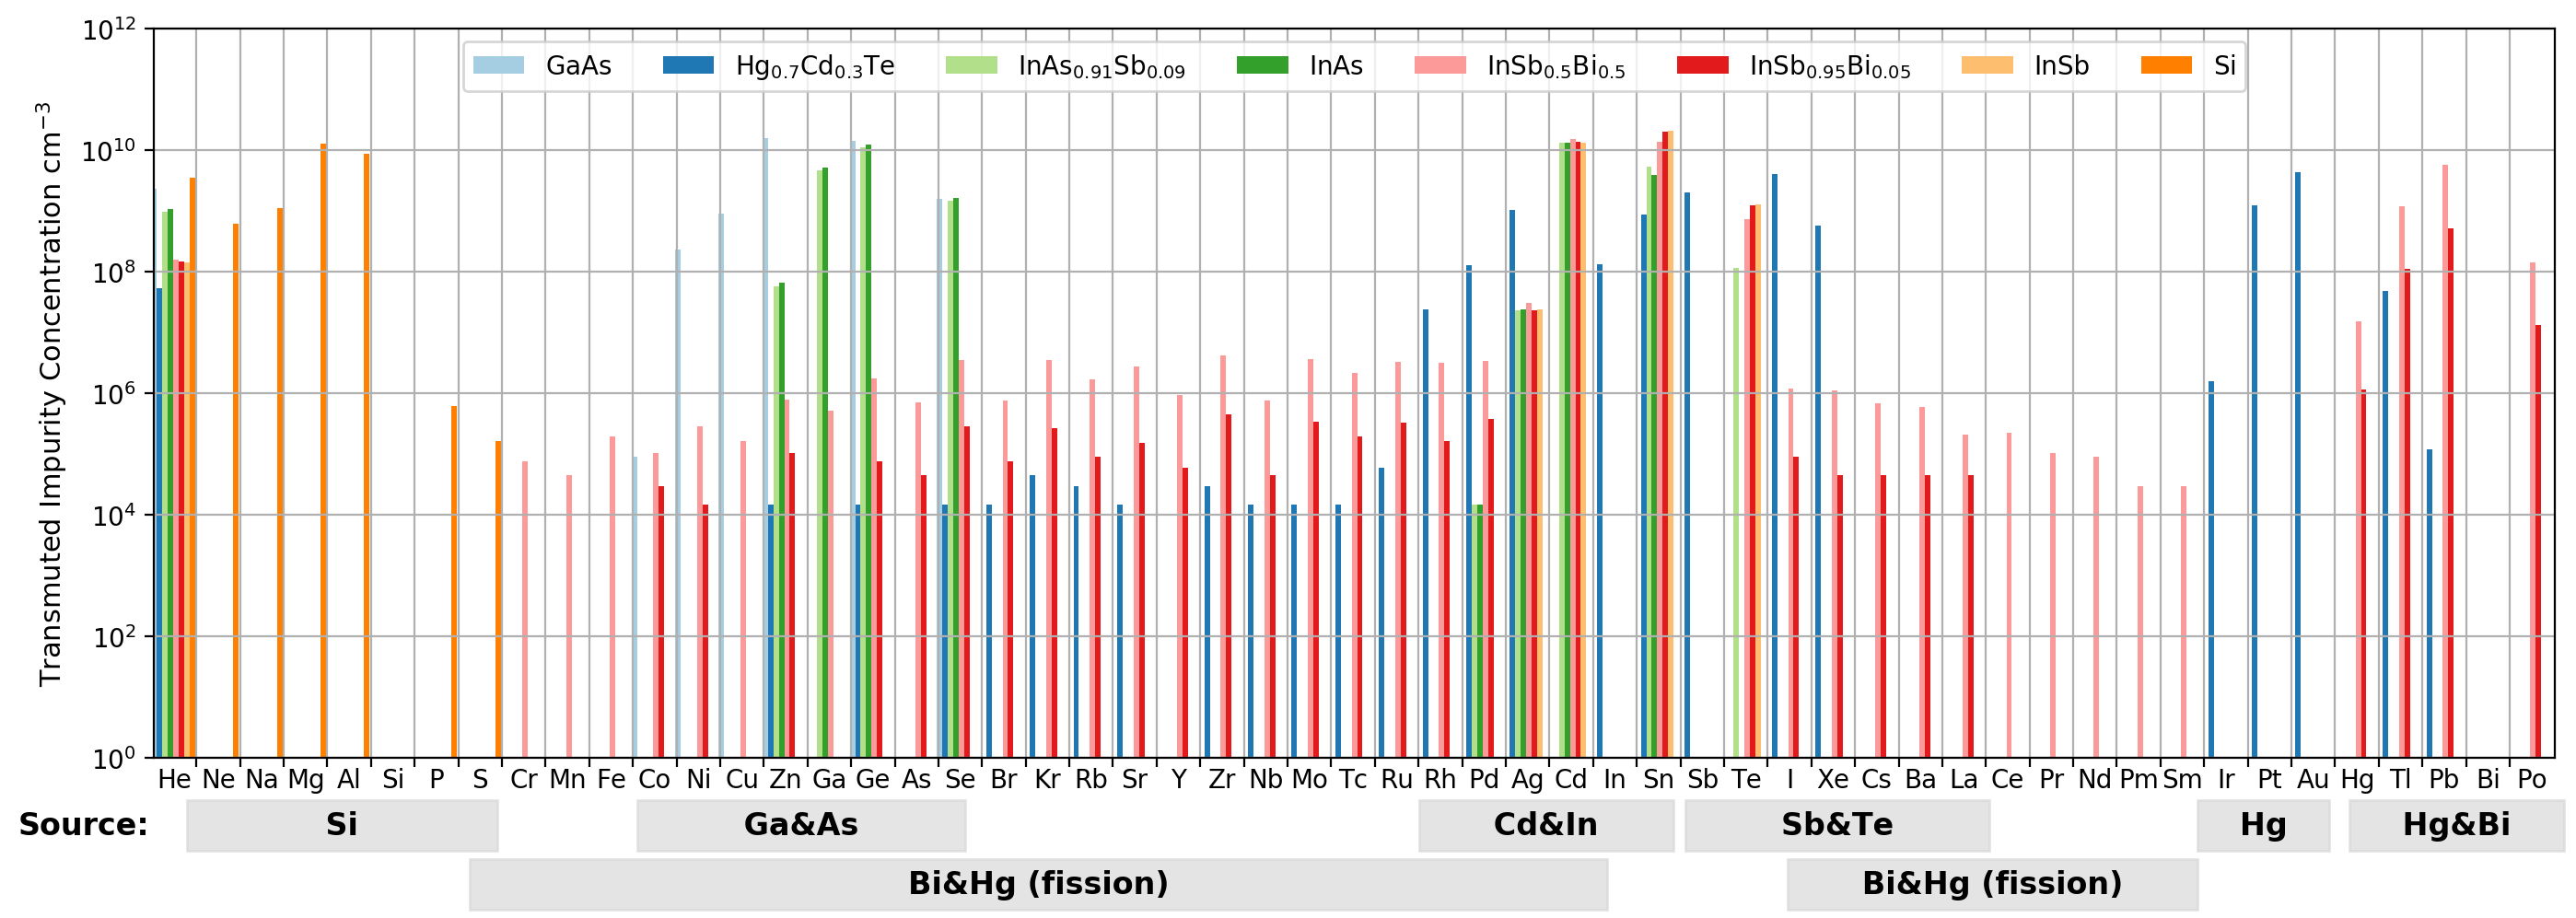

In [9]:
nice_semiconductor_names = numpy.array(['$GaAs$' , '$Hg_{0.7}Cd_{0.3}Te$' , '$InAs_{0.91}Sb_{0.09}$' , '$InAs$' , '$InSb_{0.5}Bi_{0.5}$' , '$InSb_{0.95}Bi_{0.05}$' ,'InSb', '$Si$'])



print('GEANT4')


%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# THE FINAL ONE::: 


# Setting the positions and width for the bars
pos = list(range(len(GEANT4_RESULTS_PIVOT_bySymbol_Zsort.index))) 
width = (1.0/8.0)
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(14,5.5),dpi=200)
# Create a bar with $InAs_{0.91}Sb_{0.09}$ data,
# in position pos,

# Create a bar with $InAs_{0.91}Sb_{0.09}$ data,
# in position pos,
col_names = GEANT4_RESULTS_PIVOT_bySymbol_Zsort.columns[0:8]

for num, semi in enumerate(col_names):
    print(semi, sum((GEANT4_RESULTS_PIVOT_bySymbol_Zsort[semi])*SIM_convertToEXPR_100kRAD_perCM3)/10**8)
    #a = GEANT4_RESULTS_PIVOT_bySymbol_Zsort[semi]*SIM_convertToEXPR_100kRAD_perCM3
    #print(max(a[19:30]), semi)
    
    plt.bar([p + (num)*width for p in pos], 
            (GEANT4_RESULTS_PIVOT_bySymbol_Zsort[semi])*SIM_convertToEXPR_100kRAD_perCM3, 
            # of width
            width, 
            # with alpha 0.5
            #alpha=0.5, 
            # with color
            color=colors[num], 
            # with label the first value in element
            label=GEANT4_RESULTS_PIVOT_bySymbol_Zsort['Symbol'].str.capitalize())
    
    if (semi == 'InAs_material'):
        Sn_index = numpy.argwhere(GEANT4_RESULTS_PIVOT_bySymbol_Zsort['Symbol'].str.capitalize() == 'In')
        data_InAs = numpy.array((GEANT4_RESULTS_PIVOT_bySymbol_Zsort[semi])*SIM_convertToEXPR_100kRAD_perCM3)
        print('Sn concentration: ', data_InAs[Sn_index])

# Set the y axis label
ax.set_ylabel('Transmuted Impurity Concentration $cm^{-3}$',size=11)
ax.set_xlabel('')

# Set the position of the x ticks
ax.set_xticks([p - (1.0/4.0)*width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(GEANT4_RESULTS_PIVOT_bySymbol_Zsort.index)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos), max(pos)+ width*8)
plt.ylim([1, 10**12] )

legend = nice_semiconductor_names
params = {'mathtext.default': 'regular' } 

plt.rcParams.update(params)

# Adding the legend and showing the plot
plt.legend(legend, loc='upper center',ncol=8)
plt.grid()

ax.yaxis.offsetText.set_visible(False)

labels = GEANT4_RESULTS_PIVOT_bySymbol_Zsort['Symbol'].str.capitalize()
empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels)
mticks = ax.get_xticks()

a = numpy.array((mticks[:-1]+mticks[1:])/2)
a = numpy.append(a, (a[len(a)-1] + (-a[len(a)-2]+a[len(a)-1])))

ax.set_xticks(a, minor=True)
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xticklabels(labels, minor=True)

matplotlib.pyplot.yscale('log') #, nonposy='clip')
matplotlib.pyplot.subplots_adjust(bottom=.527)
high = 0.058
low = 0.0001
txt = 'Source:'            
matplotlib.pyplot.figtext(0.03,high, txt, va="bottom", ha="center", fontsize=12,fontweight='bold')
txt = '            Si            '       
t = matplotlib.pyplot.figtext(0.13,high, txt, va="bottom", ha="center", fontsize=12,fontweight='bold',backgroundcolor='lightgray')
t.set_bbox(dict(color='lightgray', alpha=0.6, mutation_scale=12))
txt = '         Ga&As         '
t = matplotlib.pyplot.figtext(0.308,high, txt, va="bottom", ha="center", fontsize=12,fontweight='bold',backgroundcolor='lightgray')
t.set_bbox(dict(color='lightgray', alpha=0.58, mutation_scale=12))
txt = '      Cd&In      '
t = matplotlib.pyplot.figtext(0.597,high, txt, va="bottom", ha="center", fontsize=12,fontweight='bold',backgroundcolor='lightgray')
t.set_bbox(dict(color='lightgray', alpha=0.6, mutation_scale=12))
txt = '        Sb&Te        '
t = matplotlib.pyplot.figtext(0.71,high, txt, va="bottom", ha="center", fontsize=12,fontweight='bold',backgroundcolor='lightgray')
t.set_bbox(dict(color='lightgray', alpha=0.6, mutation_scale=12))
txt = '    Hg&Bi    '
t = matplotlib.pyplot.figtext(0.95,high, txt, va="bottom", ha="center", fontsize=12,fontweight='bold',backgroundcolor='lightgray')
t.set_bbox(dict(color='lightgray', alpha=0.6, mutation_scale=12))

txt = '   Hg   '
t = matplotlib.pyplot.figtext(0.875,high, txt, va="bottom", ha="center", fontsize=12,fontweight='bold',backgroundcolor='lightgray')
t.set_bbox(dict(color='lightgray', alpha=0.6, mutation_scale=12))
txt = '                                        Bi&Hg (fission)                                        '
t = matplotlib.pyplot.figtext(0.4,low, txt, va="bottom", ha="center", fontsize=12,fontweight='bold',backgroundcolor='lightgray')
t.set_bbox(dict(color='lightgray', alpha=0.6, mutation_scale=12))
txt = '      Bi&Hg (fission)      '
t = matplotlib.pyplot.figtext(0.77,low, txt, va="bottom", ha="center", fontsize=12,fontweight='bold',backgroundcolor='lightgray')
t.set_bbox(dict(color='lightgray', alpha=0.6, mutation_scale=12))


fig.tight_layout()
plt.show()

# note that the concentrations of lower mass Bi products in InSbBi are from proton induced fission
# this cross-section is not in the cross-section libraryies included in the FISPACT code so their
# existance is not predicted

In [ ]:
# density in g/cc

density_HgCdTe = 7.43 
density_GaAs = 5.31
density_InAsSb = 5.67945 
density_InSbBi_5Bi = 6.64
density_InSbBi_05Bi = 5.87
density_InSb = 5.77
density_Si = 2.33
density_InAs = 5.68

# in cm^3, 1cm x 1cm x 0.5 mm (0.05 cm)
volume = 1*1*0.05

HgCdTe_massPercent = [46.5348,11.1763,42.2889]
InAsSb_massPercent = [59.19831,35.15173,5.649964]
InSbBi_highBi_massPercent = [40.97894,21.72824,37.29281]
InSbBi_lowBi_massPercent = [47.65443,48.00879,4.336783]
InAs_massPercent = [60.51349,39.48646]
InSb_massPercent = [48.53288, 51.46712]
GaAs_massPercent = [48.203,51.797]


# sample mass in kg
print('DENSITY (g/cc) |||| MASS (kg): |||| Mass %')
print('HgCdTe: ',density_HgCdTe, round(density_HgCdTe*volume/1000,10), HgCdTe_massPercent)
print('GaAs: ',density_GaAs, round(density_GaAs*volume/1000,10), GaAs_massPercent)
print('InAsSb: ',density_InAsSb, round(density_InAsSb*volume/1000,10), InAsSb_massPercent)
print('InSbBi_5Bi: ',density_InSbBi_5Bi, round(density_InSbBi_5Bi*volume/1000,10), InSbBi_highBi_massPercent)
print('InSbBi_05Bi: ', density_InSbBi_05Bi,round(density_InSbBi_05Bi*volume/1000,10), InSbBi_lowBi_massPercent)
print('InSb: ',density_InSb, round(density_InSb*volume/1000,10), InSb_massPercent)
print('Si: ', density_Si,round(density_Si*volume/1000,10), [1])
print('InAs: ',density_InAs, round(density_InAs*volume/1000,10), InAs_massPercent)

In [ ]:

# at 46 days
normalize = 10**10
for num, semi in enumerate(col_names):
    print(semi, sum(GEANT4_RESULTS_PIVOT_bySymbol_Zsort[semi]*SIM_convertToEXPR_100kRAD_perCM3/normalize))
